In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import scipy.io
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [4]:
mat = scipy.io.loadmat('olivettifaces.mat')

In [5]:
dataset = mat['faces']
dataset.shape

(4096, 400)

In [6]:
dataset

array([[ 75, 110,  77, ..., 121,  52, 125],
       [ 83, 108,  75, ..., 119,  49, 125],
       [ 83, 120,  65, ..., 113,  51, 125],
       ..., 
       [ 42,  35,  37, ...,  41, 143,  96],
       [ 40,  33,  38, ...,  45, 144,  91],
       [ 38,  37,  37, ...,  46, 146,  93]], dtype=uint8)

In [9]:
scaler = StandardScaler()
scaler_dataset = scaler.fit_transform(dataset)

c:\users\min\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [12]:
scaler_dataset.shape

(4096, 400)

In [15]:
pca = PCA(n_components=400)
pca_scores = pca.fit_transform(scaler_dataset)
pca_scores.shape

(4096, 400)

In [12]:
from sklearn.datasets import fetch_olivetti_faces

In [13]:
olivetti = fetch_olivetti_faces()

In [16]:
olivetti['data'].shape

(400, 4096)

## (a) Generate a simulated data

In [2]:
np.random.seed(321)
n_clusters = 3
X, y = make_blobs(n_samples= 60, n_features=20, centers = n_clusters, 
                 cluster_std = 1.0, shuffle = True, random_state = 123)

In [6]:
print("X:", X.shape)
print("y:", y.shape)
labels = np.unique(y)
print("label:", labels)

X: (60, 20)
y: (60,)
label: [0 1 2]


In [266]:
#Standardize
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled.shape

(60, 20)

## (b) PCA

In [267]:
pca = PCA(n_components=20)
pca_scores = pca.fit_transform(X_scaled)
pca_scores.shape

(60, 20)

In [268]:
print(pca.explained_variance_ratio_)

[ 0.49182498  0.30417251  0.04977358  0.03723334  0.02895764  0.01938065
  0.01389366  0.01233491  0.00914687  0.00690353  0.00645606  0.0050294
  0.00449884  0.00266037  0.00220097  0.0016553   0.00138825  0.00117977
  0.00081106  0.0004983 ]


In [269]:
pca_scores[y == 1, 0] #first PCA labed as y == 1

array([-3.50484716, -3.69717012, -3.51126438, -2.95436004, -3.84778926,
       -3.06429451, -3.15006893, -3.83171271, -3.1772377 , -3.16882176,
       -3.00268821, -3.7616787 , -3.54219033, -3.36091227, -3.38409617,
       -3.32920287, -4.03164733, -3.2034474 , -2.92497391, -3.23564852])

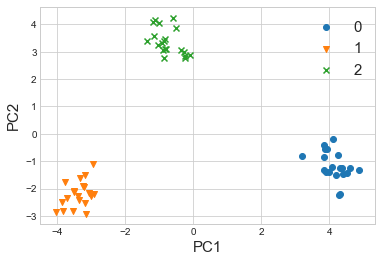

In [270]:
labels = np.unique(y)
markers = ['o', 'v', 'x']
with plt.style.context("seaborn-whitegrid"):
    for label, marker in zip(labels, markers):
        plt.scatter(pca_scores[y ==label, 0], pca_scores[y ==label, 1], 
                    label = label, marker=marker)
    plt.xlabel("PC1", fontsize = 15)
    plt.ylabel("PC2", fontsize = 15)
    plt.legend(loc = 'best', fontsize = 15)
    plt.show()

## (C) K-means (K = 3)

In [271]:
kmeans = KMeans(n_clusters=3, random_state=123)
kmeans.fit(X)
y_pred_3 = kmeans.predict(X)
confusion_matrix(y_pred=y_pred_3, y_true=y, labels=[0, 1, 2])

array([[ 0,  0, 20],
       [ 0, 20,  0],
       [20,  0,  0]], dtype=int64)

## (D) K-means (K = 2)

In [272]:
kmeans = KMeans(n_clusters=2, random_state=123)
kmeans.fit(X)
y_pred_2 = kmeans.predict(X)
confusion_matrix(y_pred=y_pred_2, y_true=y, labels=[0, 1, 2])

array([[20,  0,  0],
       [ 0, 20,  0],
       [20,  0,  0]], dtype=int64)

## (E) K-means (K = 4)

In [273]:
kmeans = KMeans(n_clusters=4, random_state=123)
kmeans.fit(X)
y_pred_4 = kmeans.predict(X)
confusion_matrix(y_pred=y_pred_4, y_true=y, labels=[0, 1, 2, 3])

array([[ 0,  0, 20,  0],
       [ 0,  9,  0, 11],
       [20,  0,  0,  0],
       [ 0,  0,  0,  0]], dtype=int64)

## (F) K-means (K = 3) based on the PC1 and PC2

In [274]:
pca_firsttwo = pca_scores[:, 0:2]
pca_firsttwo.shape

(60, 2)

In [275]:
kmeans = KMeans(n_clusters=3, random_state=123)
kmeans.fit(pca_firsttwo)
y_pred_pc = kmeans.predict(pca_firsttwo)
confusion_matrix(y_pred=y_pred_pc, y_true=y, labels=[0, 1, 2])

array([[ 0, 20,  0],
       [ 0,  0, 20],
       [20,  0,  0]], dtype=int64)

## (G) K-means (K=3) based on the scaled X

In [276]:
kmeans = KMeans(n_clusters=3, random_state=123)
kmeans.fit(X_scaled)
y_pred_3_scaled = kmeans.predict(X_scaled)
confusion_matrix(y_pred=y_pred_3_scaled, y_true=y, labels=[0, 1, 2])

array([[ 0, 20,  0],
       [ 0,  0, 20],
       [20,  0,  0]], dtype=int64)